# 중간고사 예상문제

In [14]:
import numpy as np
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp

In [15]:
import matplotlib.pyplot as plt

In [16]:
tnp.experimental_enable_numpy_behavior()

## `1`. 경사하강법과 tf.GradientTape()의 사용방법 (30점)

`(1)` 아래는 $X_i \overset{iid}{\sim} N(3,2^2)$ 를 생성하는 코드이다. (10점)

In [17]:
tf.random.set_seed(43052)
x= tnp.random.randn(10000)*2+3
x

<tf.Tensor: shape=(10000,), dtype=float64, numpy=
array([ 4.12539849,  5.46696729,  5.27243374, ...,  2.89712332,
        5.01072291, -1.13050477])>

함수 $L(\mu,\sigma)$을 최대화하는 $(\mu,\sigma)$를 `tf.GradeintTape()`를 활용하여 추정하라. (경사하강법 혹은 경사상승법을 사용하고 $\mu$의 초기값은 2로 $\sigma$의 초기값은 3으로 설정할 것) 

$$L(\mu,\sigma)=\prod_{i=1}^{n}f(x_i), \quad f(x_i)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}(\frac{x_i-\mu}{\sigma})^2}$$

**hint**: $L(\mu,\sigma)$를 최대화하는 $(\mu,\sigma)$는 $\log L(\mu,\sigma)$를 역시 최대화한다는 사실을 이용할 것.

**hint:** $\mu$의 참값은 3, $\sigma$의 참값은 2이다. (따라서 $\mu$와 $\sigma$는 각각 2와 3근처로 추정되어야 한다.) 

`-` 풀이

In [18]:
N = 10000

In [19]:
y_true=(x-3)**2/2**2

In [20]:
epsilon = tnp.random.randn(N)*0.5
y=(x-3)**2/2**2+epsilon

In [21]:
x.shape, y.shape

(TensorShape([10000]), TensorShape([10000]))

In [22]:
beta = tf.Variable(2.0)
alpha = tf.Variable(3.0)

In [23]:
for epoc in range(1000):   
    with tf.GradientTape() as tape: 
        yhat = (x-beta)**2/(alpha**2)
        loss = tf.reduce_sum((y-yhat)**2)/N 
    slope0,slope1 = tape.gradient(loss,[beta,alpha]) 
    beta.assign_sub(alpha * slope0) 
    alpha.assign_sub(alpha * slope1) 

In [24]:
beta, alpha

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=161.78185>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=159.62784>)

In [25]:
yhat=(x-beta)**2/(alpha**2)

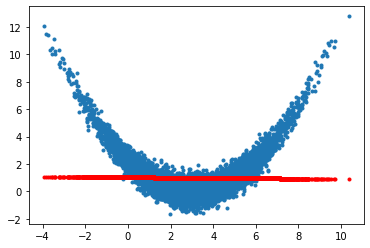

In [26]:
plt.plot(x,y,'.')
plt.plot(x,yhat,'r.')